In [49]:
# Import the numpy and pandas packages
import numpy as np
import pandas as pd



# Step 0: Load the dataset in the working folder

In [50]:
import zipfile
import os
# I am runing the WSL Ubuntu on my Windows 11 machine, so I have to specify the path to the Windows file system

os.chdir("/mnt/c/Users/jeffd/OneDrive/Desktop/WSU Classes/Data_319_Data_Structures/HW3")
zip_path = "/mnt/c/Users/jeffd/OneDrive/Desktop/WSU Classes/Data_319_Data_Structures/HW3/movies_data.zip"
unzip_path ="/mnt/c/Users/jeffd/OneDrive/Desktop/WSU Classes/Data_319_Data_Structures/HW3"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_path)


In [51]:
# list the contents of the Present Working Directory (also called pwd)
# I have windows so I am using the !dir command. If you are using a Mac or Linux, use !ls
!ls

'Assignment 3.pdf'			   MovieAssignmentData.csv
 Caldeorn_HW3_movies_data_analysis.ipynb   __MACOSX
 HW3_movies_data_analysis.ipynb		   movies_data.zip


# Step 1: Reading and Inspection



### Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [52]:

movies = pd.DataFrame(pd.read_csv("./MovieAssignmentData.csv")) # pd.read_csv function is used to read the data
movies.head() # notice the use of the .head() function for quickly displaying the data to get a feel

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.00,NaN,Rob Walker,131.00,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.00,7.10,NaN,0


### Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [53]:
# Row, columns in the Data
movies.shape

(5043, 28)

In [54]:
# Concise summary of the Dataframe.
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

**How many null values does the column with gross budget of the movie (by the name `gross`) have?** [5]

Summary of the 'gross' column:
Count: 4159
Mode: 3,000,000
Median: 25,517,500
Mean: 48,468,408
Standard Deviation: 68,452,990
Variance: 4,685,811,900,007,989
Minimum: 162
Maximum: 760,505,847
quantile 25%: 5,340,988
quantile 50%: 25,517,500
quantile 75%: 62,309,438
Skew: 3.13


Text(0.5, 1.0, 'Distribution of Gross Earnings')

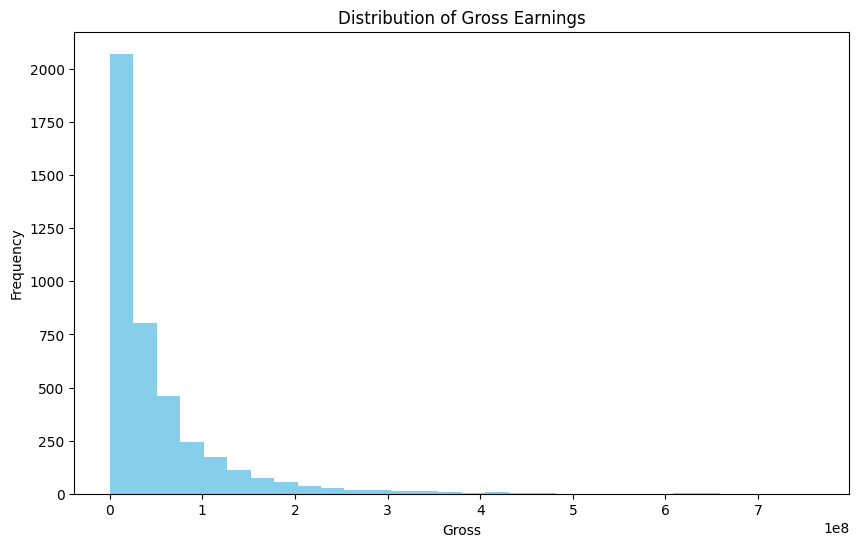

In [55]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution,
# excluding NaN values
import matplotlib.pyplot as plt

# Summary of the 'gross' column
print(f"Summary of the 'gross' column:")
print(f"Count: {movies['gross'].count()}")
print(f"Mode: {movies['gross'].mode().values[0]:,.0f}")
print(f"Median: {movies['gross'].median():,.0f}")
print(f"Mean: {movies['gross'].mean():,.0f}")
print(f"Standard Deviation: {movies['gross'].std():,.0f}")
print(f"Variance: {movies['gross'].var():,.0f}")
print(f"Minimum: {movies['gross'].min():,.0f}")
print(f"Maximum: {movies['gross'].max():,.0f}")
print(f'quantile 25%: {movies["gross"].quantile(0.25):,.0f}')
print(f'quantile 50%: {movies["gross"].quantile(0.50):,.0f}')
print(f'quantile 75%: {movies["gross"].quantile(0.75):,.0f}')

# check skew of the 'gross' column
print(f"Skew: {movies['gross'].skew():,.2f}")
histogram = movies['gross'].hist(bins=30, grid=False, figsize=(10, 6), color='skyblue')
histogram.set_xlabel('Gross')
histogram.set_ylabel('Frequency')
histogram.set_title('Distribution of Gross Earnings')   


**What is the longest duration of any movie in the dataset?** [5]

In [56]:
print(movies.duration.describe().round(2))
max_num = movies.duration.max()
print(f'\nMaxumum duration movie set is {max_num} minutes long.')

long_movie = movies[movies.duration == max_num]

for movie in long_movie['movie_title']:
    print(f'{movie.strip()} is {max_num} minutes long.')
    print('A fitting name for scuh a long movie')


count   5028.00
mean     107.20
std       25.20
min        7.00
25%       93.00
50%      103.00
75%      118.00
max      511.00
Name: duration, dtype: float64

Maxumum duration movie set is 511.0 minutes long.
Trapped is 511.0 minutes long.
A fitting name for scuh a long movie


**How many directors are there?** [5]

In [57]:
movies_with_dir = movies.copy(deep=True) # copy the dataframe to another variable
movies_with_dir.dropna(subset=['director_name'], inplace=True) # drop the rows where director_name is missing
nan_values = movies.shape[0] - movies_with_dir.shape[0] # calculate the number of nan values

print(f"\nNan values in the dataset is {nan_values}.")
print(f"of {len(movies)} movies in the dataset.") 

directors = [x for x in movies_with_dir.director_name if isinstance(x, str)] 
directors = list(set(directors)) # this will remove duplicates
print(f'\nThere are {len(directors)} directors in the dataset.')

# for fun let's see what director had the most facebook likes
director_fb_likes = movies_with_dir.groupby('director_name')['director_facebook_likes'].sum()
top = director_fb_likes.nlargest(5)
top_index = movies_with_dir.director_facebook_likes.idxmax()
top_dir = " director of ".join(
    [movies_with_dir[ movies_with_dir.index == top_index].director_name.values[0], movies_with_dir[movies_with_dir.index == top_index].movie_title.values[0] ]
    ).strip('')

#best movies by director and single highest facebook likes
print(f'\nThe directors with the most facebook likes.')
for idx, value in top.items():
    print(f"{idx}: {value}")
print(f'\n{top_dir}received the single highest Facebook likes for that movie.')



Nan values in the dataset is 104.
of 5043 movies in the dataset.

There are 2398 directors in the dataset.

The directors with the most facebook likes.
Steven Spielberg: 364000.0
Martin Scorsese: 340000.0
Clint Eastwood: 320000.0
Woody Allen: 242000.0
David Fincher: 210000.0

Joseph Gordon-Levitt director of Don Jon received the single highest Facebook likes for that movie.


**How many Genres are there in the dataset?**

In [58]:
movie_genres = movies.copy(deep=True)
movie_genres.dropna(subset=['genres'], inplace=True)
genres = [x for x in movie_genres.genres if isinstance(x, str)]
genres = list(set(genres)) # same process as before

print(f'genres: {genres[:5]}') 
print('No! The genres are all mixed up')
print('\nWe\'ll make a mega string and then parse it')

mega_string = ' '.join(genres) # using the list not list(set()) to keep the duplicates
mega_string = mega_string.replace('|', ' ')
genres = mega_string.split(' ')
genres = list(set(genres)) # remove duplicates

print(f'genres: {genres[:4]}') 
print('Much better!\n')
print(f'There are {len(genres)} genres in the dataset.')
del movie_genres, mega_string, movies_with_dir # clean up the variables we no longer need

genres: ['Action|Adventure|Family|Mystery', 'Animation|Drama|Family|Musical|Romance', 'Action|Adventure|Drama|Romance|Thriller', 'Comedy|Crime|Sci-Fi|Thriller', 'Comedy|Family|Fantasy|Sport']
No! The genres are all mixed up

We'll make a mega string and then parse it
genres: ['News', 'Comedy', 'Biography', 'Family']
Much better!

There are 26 genres in the dataset.


**What is the number of different languages for the movies in the dataset?** [5]

In [59]:
movie_lang = movies.copy(deep=True)
movie_lang.dropna(subset=['language'], inplace=True)
languages = [x for x in movie_lang.language]
languages = list(set(languages)) # remove duplicates

print(f'languages {languages[:5]}...')
print('Yes, that looks good!\n')
print(f'There are {len(languages)} languages in the dataset.')

languages ['Kannada', 'French', 'Polish', 'Cantonese', 'Slovenian']...
Yes, that looks good!

There are 46 languages in the dataset.


# Step 2: Cleaning the Data

### Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. 

In [60]:
# Code for column-wise null count here
# I need to make sure I am counting all the nulls
# It should add up to the total number of rows in the dataset
print(f'All null values:\n{movies.isnull().sum()}\n')
#



All null values:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64



In [61]:

# I need to make sure I am counting all the nulls
# It should add up to the total number of rows in the dataset
print(f'All null values:\n{movies.isnull().sum()}\n')
#
null_percent = []
for name, null_count in movies.isnull().sum().to_dict().items(): # As a dict axis will be detemined by the key/value pairs
    movies_count = movies[name].count() # count all the non-null values
    check = null_count + movies_count == movies.shape[0] # nulls plus non-nulls should equal the total number of rows
    if not check: # if it doesn't add up we have a problem
        print(f'Oh no! movies_count {movies_count}, nulls {null_count} doesn\'t add up to {movies.shape[0]}')
    
    percent = (null_count / movies.shape[0]) * 100
    null_percent.append((name, percent))
    
print(f'Null values by percentage:\n')
for name, percent in null_percent:
    print(f'{name}: {percent:.2f}%')


All null values:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Null values by percentage:

color: 0.38%
dire

### Fill NaN values
You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [62]:
clean_movies = movies.copy(deep=True)
clean_movies['language'] = clean_movies['language'].fillna('English') # fill the missing values with English

In [63]:
# int(movies.language.isnull().sum() should be 0 to check to make sure it worked
print(f'\nLooks like I have {int(clean_movies.language.isnull().sum())} or no more nulls in this column. So it worked')



Looks like I have 0 or no more nulls in this column. So it worked


### Drop unecessary rows
Some of the rows might have greater than five NaN values. Such rows aren't of much use for the analysis and hence, we can safely remove them

In [64]:
# modify the data in place dropping Nan rows where NaN > 5
original_rows = movies.shape[0]
min_non_na = clean_movies.shape[1] - 5 # the minimum number of non-NaN values

print(f'\nBefore dropping rows with more than 5 NaN values we have {movies.shape[0]} rows.')

original_columns = movies.shape[1]
clean_movies = clean_movies.dropna(thresh=min_non_na)

print(f'\nAfter dropping rows with more than 5 NaN values we have {clean_movies.shape[0]} rows left.')



Before dropping rows with more than 5 NaN values we have 5043 rows.

After dropping rows with more than 5 NaN values we have 4970 rows left.


### Check the number of retained rows
You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [65]:
percent_retained = (clean_movies.shape[0] / original_rows) * 100
print(f'That means we retained {percent_retained:.2f}% of the original data.')

That means we retained 98.55% of the original data.


### Count duplicate data entries
Count the number of duplicate rows. Use the `.drop_diplicates()` function of pandas

In [66]:
dups = len(movies)-len(movies.drop_duplicates())
print(f'\nThere are {dups} duplicate rows in the dataset.')


There are 45 duplicate rows in the dataset.


In [67]:

# I am going to drop the duplicates in the cleaned dataset
clean_movies = clean_movies.drop_duplicates()
print(f'\nAfter dropping duplicates we have {clean_movies.shape[0]} rows left.')
percent_retained = (clean_movies.shape[0] / original_rows) * 100
print(f'That means we retained {percent_retained:.2f}% of the original data.')



After dropping duplicates we have 4925 rows left.
That means we retained 97.66% of the original data.


# Step 3: Data Analysis

### Find the movies with highest profit

- Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
- Sort the dataframe using the `profit` column as reference.
- Extract the top ten profiting movies in descending order and store them in a new dataframe called `top10`


In [68]:
# Lets calculate the profit 
clean_movies['profit'] = clean_movies.gross - clean_movies.budget

In [69]:
clean_movies = clean_movies.sort_values(by='profit', ascending=False)
print(clean_movies[['movie_title','profit']].head(2)) # print the top 2 check sort

        movie_title       profit
0           Avatar  523505847.00
29  Jurassic World  502177271.00


In [70]:
# print the top 10 movies data
movies_by_profit = clean_movies[['movie_title','profit']].copy(deep=True) # print the top 2 check sort
top10 = movies_by_profit.head(10)# remove index
top10 = top10.reset_index(drop=True)
#start index at one
top10.index += 1
print(top10)

                                   movie_title       profit
1                                      Avatar  523505847.00
2                              Jurassic World  502177271.00
3                                     Titanic  458672302.00
4          Star Wars: Episode IV - A New Hope  449935665.00
5                  E.T. the Extra-Terrestrial  424449459.00
6                                The Avengers  403279547.00
7                               The Lion King  377783777.00
8   Star Wars: Episode I - The Phantom Menace  359544677.00
9                             The Dark Knight  348316061.00
10                           The Hunger Games  329999255.00


### Find IMDb Top 250 Movies

- Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Ensure that for each of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [71]:
IMDb_Top_250 = movies.copy(deep=True)

# See coluns before dropping
print(IMDb_Top_250.shape)
IMDb_Top_250['num_voted_users'] = IMDb_Top_250['num_voted_users'].astype(int)
IMDb_Top_250 = IMDb_Top_250[IMDb_Top_250['num_voted_users'] > 25000]

# check to see if it worked
print(IMDb_Top_250.shape)
print('Number decerased, looks like it worked')

# sort the data by imdb_score
IMDb_Top_250 = IMDb_Top_250.sort_values(by='imdb_score', ascending=False)
IMDb_Top_250 = IMDb_Top_250.head(250)
IMDb_Top_250 = IMDb_Top_250.drop_duplicates()
IMDb_Top_250['rank'] = range(1, 1+len(IMDb_Top_250)) # since it is already in order
#make rank the first column
cols = IMDb_Top_250.columns.tolist()
cols = cols[-1:] + cols[:-1]
IMDb_Top_250 = IMDb_Top_250[cols]
# print the top 10 movies data
print("\nTop 10 movies by IMDb score:")
print(IMDb_Top_250[['rank','movie_title','imdb_score']].head(10)) # print the top 10 check sorta


(5043, 28)
(2874, 28)
Number decerased, looks like it worked

Top 10 movies by IMDb score:
      rank                                     movie_title  imdb_score
1937     1                       The Shawshank Redemption         9.30
3466     2                                  The Godfather         9.20
66       3                                The Dark Knight         9.00
2837     4                         The Godfather: Part II         9.00
3481     5                              Fargo                     9.00
3355     6                                   Pulp Fiction         8.90
1874     7                               Schindler's List         8.90
4498     8                 The Good, the Bad and the Ugly         8.90
4822     9                                   12 Angry Men         8.90
339     10  The Lord of the Rings: The Return of the King         8.90


In [72]:
# print a sample of the dataset
IMDb_Top_250

,rank,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,1,Color,Frank Darabont,199.00,142.00,0.00,461.00,Jeffrey DeMunn,11000.00,28341469.00,...,4144.00,English,USA,R,25000000.00,1994.00,745.00,9.30,1.85,108000
3466,2,Color,Francis Ford Coppola,208.00,175.00,0.00,3000.00,Marlon Brando,14000.00,134821952.00,...,2238.00,English,USA,R,6000000.00,1972.00,10000.00,9.20,1.85,43000
66,3,Color,Christopher Nolan,645.00,152.00,22000.00,11000.00,Heath Ledger,23000.00,533316061.00,...,4667.00,English,USA,PG-13,185000000.00,2008.00,13000.00,9.00,2.35,37000
2837,4,Color,Francis Ford Coppola,149.00,220.00,0.00,3000.00,Al Pacino,22000.00,57300000.00,...,650.00,English,USA,R,13000000.00,1974.00,14000.00,9.00,1.85,14000
3481,5,Color,NaN,54.00,53.00,NaN,1000.00,Adam Goldberg,4000.00,NaN,...,173.00,English,USA,TV-MA,NaN,NaN,1000.00,9.00,1.78,61000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,244,Color,David Lean,89.00,200.00,767.00,382.00,Klaus Kinski,597.00,111722000.00,...,255.00,English,USA,PG-13,11000000.00,1965.00,396.00,8.00,2.35,7000
3179,245,Color,David Lynch,143.00,112.00,0.00,201.00,Richard Farnsworth,874.00,6197866.00,...,414.00,English,France,G,10000000.00,1999.00,262.00,8.00,2.35,0
1008,246,Color,Brad Bird,162.00,90.00,663.00,521.00,Harry Connick Jr.,14000.00,23159305.00,...,514.00,English,USA,PG,70000000.00,1999.00,631.00,8.00,2.35,0
3344,247,Color,Karan Johar,210.00,128.00,160.00,81.00,Jimmy Shergill,8000.00,4018695.00,...,235.00,Hindi,India,PG-13,12000000.00,2010.00,327.00,8.00,2.35,27000


Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [73]:
Top_Foreign_Lang_Film = IMDb_Top_250.copy(deep=True)
Top_Foreign_Lang_Film = Top_Foreign_Lang_Film[Top_Foreign_Lang_Film['language'] != 'English'] # remove English movies

In [74]:
# print the top 5 foreign language films
Top_Foreign_Lang_Film.head()['movie_title']

4498    The Good, the Bad and the Ugly 
4747                     Seven Samurai 
4029                       City of God 
2373                     Spirited Away 
4259               The Lives of Others 
Name: movie_title, dtype: object